In [96]:
import re
def read_result(result_file):
    fileobj = open(result_file,"r")
    last_epoch = 0
    loss_counter = 0
    accuracy_counter = 0
    cumulated_loss= 0
    cumulated_accuracy = 0

    training_loss_by_epoch = []
    training_accuracy_by_epoch = []
    validation_loss_by_epoch = []
    validation_accuracy_by_epoch = []
    
    for line in fileobj:
        m = re.match(r"Epoch (\d+) validation accuracy= (\d+\.\d+) validation loss= (\d+\.\d+)", line)
        if m:
            validation_epoch = int(m.group(1))
            validation_accuracy = float(m.group(2))
            validation_loss = float(m.group(3))
            validation_loss_by_epoch.append(validation_loss)
            validation_accuracy_by_epoch.append(validation_accuracy*100)
            
        m = re.match(r"Epoch \[(\d+)/(\d+)\], Step \[(\d+)/(\d+)\], Loss: (\d+\.\d+), Accuracy:(\d+\.\d+)", line)
        if m:
            epoch = int(m.group(1))
            total_epoch = int(m.group(2))
            step = int(m.group(3))
            total_step = int(m.group(4))
            loss = m.group(5)
            accuracy = m.group(6)
            loss_counter+=1
            accuracy_counter+=1
            if epoch!=last_epoch:
                if last_epoch != 0:
                    training_loss_by_epoch.append(cumulated_loss/loss_counter)
                    training_accuracy_by_epoch.append(cumulated_accuracy / accuracy_counter)
                last_epoch=epoch
                loss_counter = 0
                accuracy_counter = 0
                cumulated_loss= 0
                cumulated_accuracy = 0


            cumulated_loss+=float(loss)
            cumulated_accuracy+=float(accuracy)*100
    #Last line:
    loss_counter+=1
    accuracy_counter+=1
    print(cumulated_loss, loss_counter)
    print(cumulated_accuracy, accuracy_counter)
    training_loss_by_epoch.append(cumulated_loss/loss_counter)
    training_accuracy_by_epoch.append(cumulated_accuracy / accuracy_counter)
    return (training_loss_by_epoch, training_accuracy_by_epoch, validation_loss_by_epoch, validation_accuracy_by_epoch)

# Training curves.

In [97]:
training_loss_by_epoch, training_accuracy_by_epoch, validation_loss_by_epoch, validation_accuracy_by_epoch = read_result("2019-02-10-13_38_18.txt")

2.5869 7
597.0 7


In [98]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 300




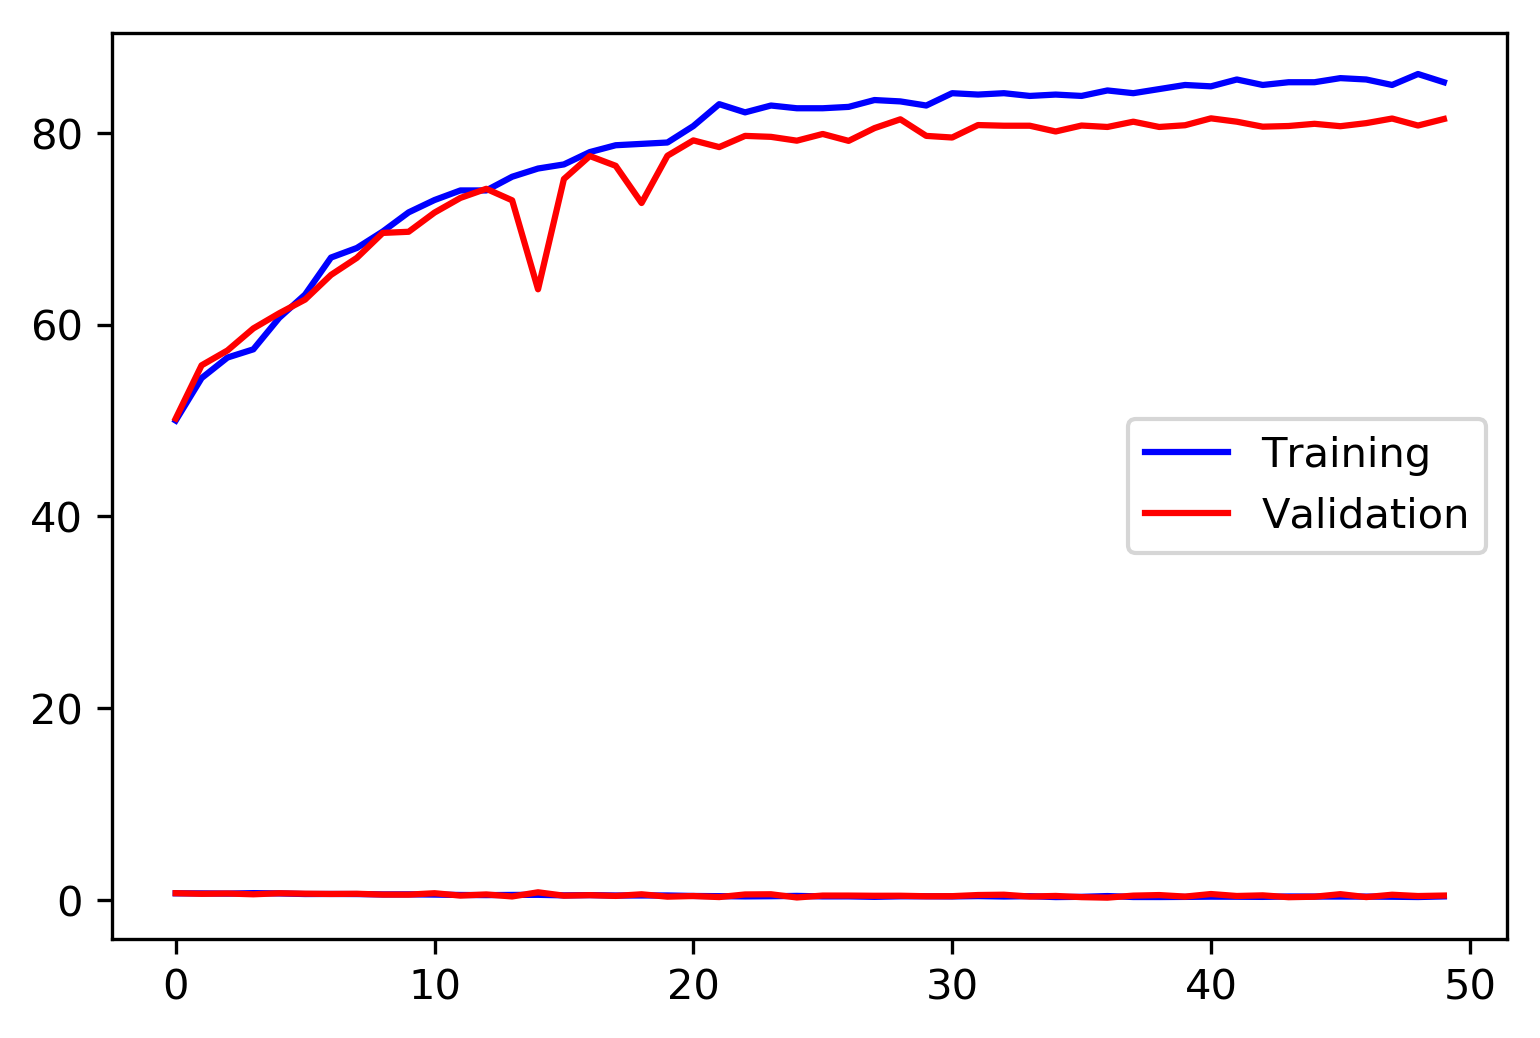

In [99]:
epochs = list(range(len(training_loss_by_epoch)))
plt.plot(epochs, training_loss_by_epoch,"b", label='Training')        # plot x and y using default line style and color
plt.plot(epochs, training_accuracy_by_epoch,"b")
plt.plot(epochs, validation_loss_by_epoch,"r", label="Validation")        # plot x and y using default line style and color
plt.plot(epochs, validation_accuracy_by_epoch,"r")
plt.legend()

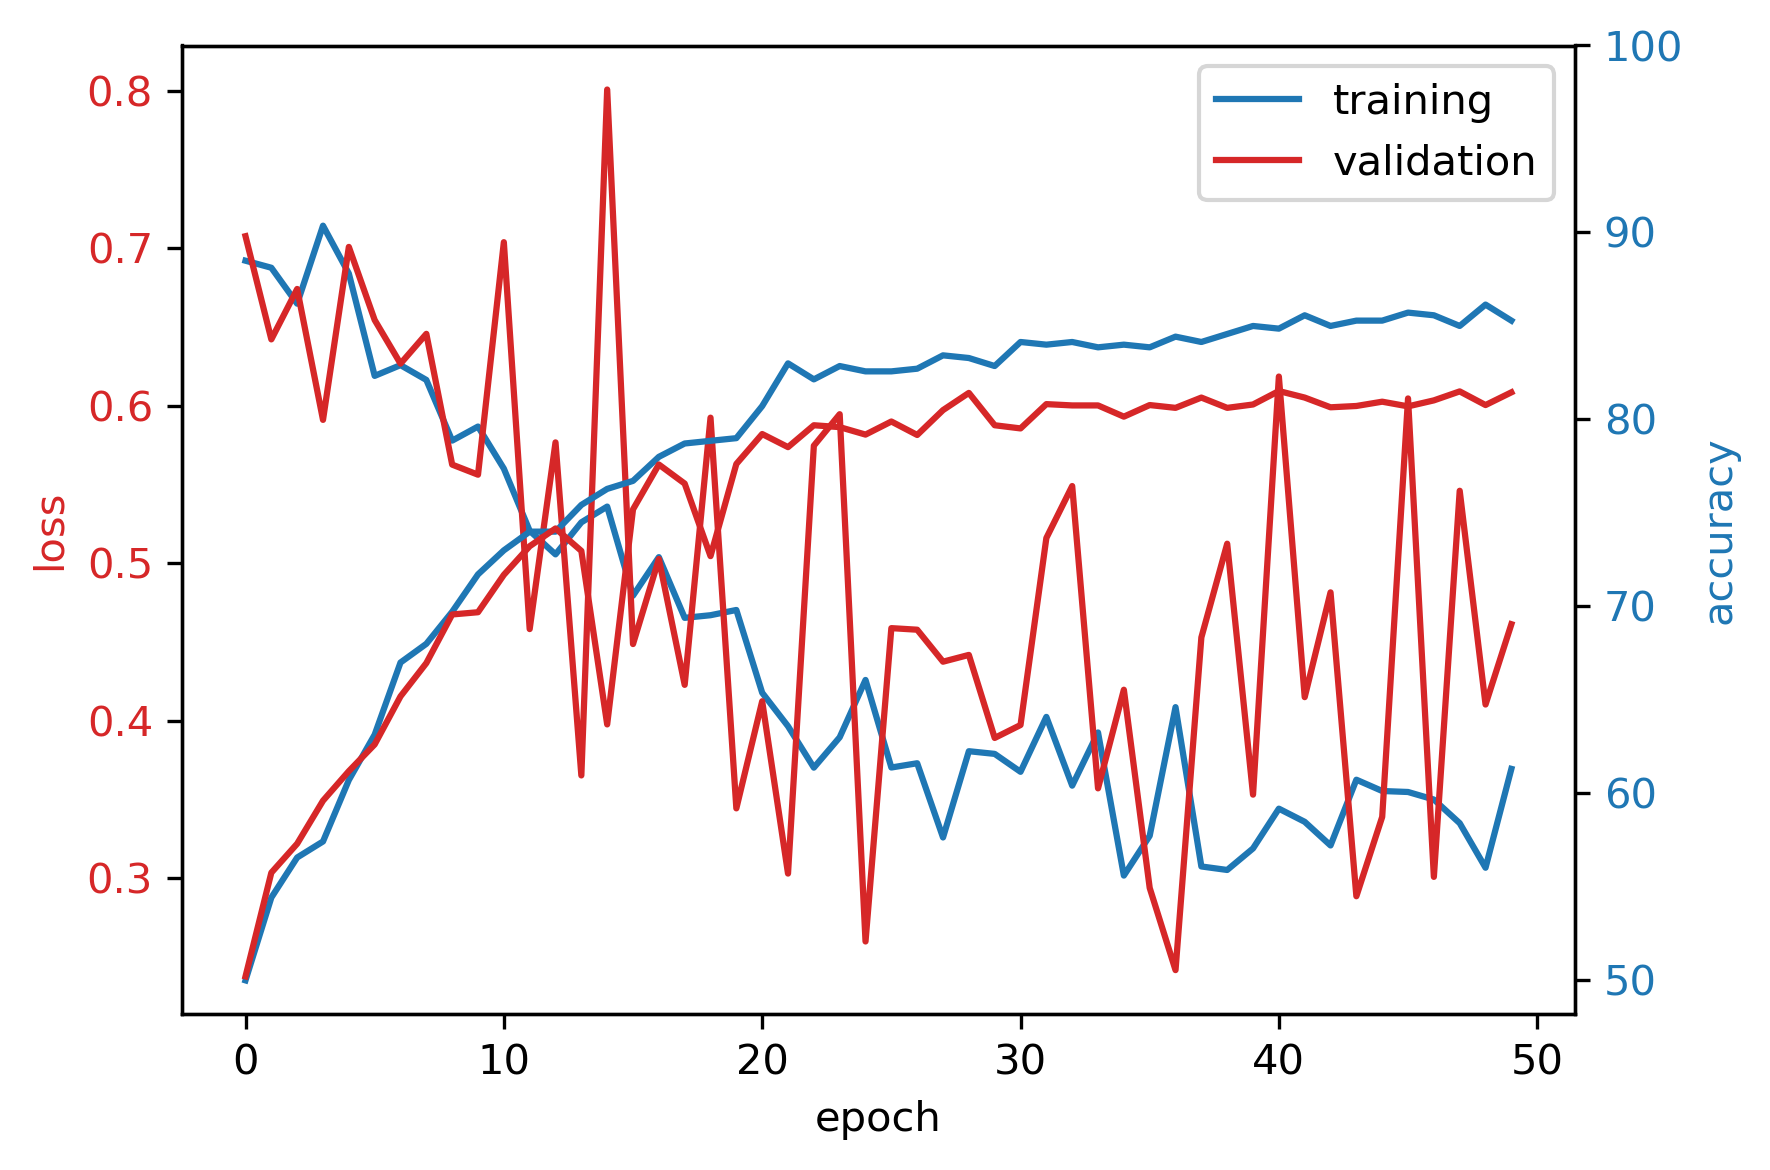

In [108]:


import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss', color=color)
ax1.plot(epochs, training_loss_by_epoch, color='tab:blue', label="training")
ax1.plot(epochs, validation_loss_by_epoch, color='tab:red', label="validation")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(epochs, training_accuracy_by_epoch, color='tab:blue')
ax2.plot(epochs, validation_accuracy_by_epoch, color='tab:red')
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(top=100)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

